In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
df = sns.load_dataset(('titanic'))
df.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
# 불필요한 열 정리
df.drop(columns=['sibsp','parch','embarked','class','adult_male','deck','embark_town','alive'], inplace=True)

In [6]:
df.describe()

,survived,pclass,age,fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [7]:
df.isnull().sum()
# age에 존재하는 결측치 제거 필요

survived      0
pclass        0
sex           0
age         177
fare          0
who           0
alone         0
dtype: int64

In [8]:
# 결측치 제거
df.dropna(axis=0, how='any', inplace=True)
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
fare        0
who         0
alone       0
dtype: int64

In [9]:
# dataframe 요약정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   sex       714 non-null    object 
 3   age       714 non-null    float64
 4   fare      714 non-null    float64
 5   who       714 non-null    object 
 6   alone     714 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 39.7+ KB


<Axes: xlabel='age', ylabel='Count'>

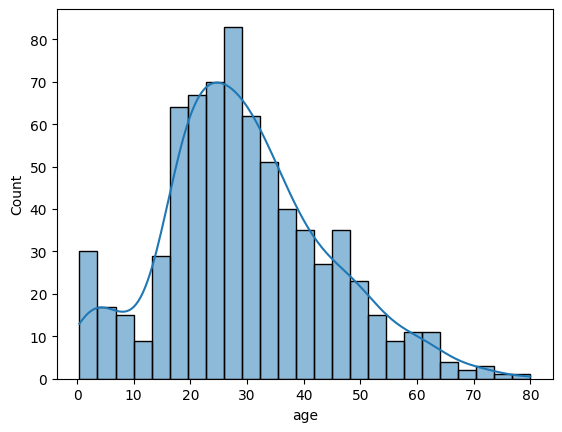

In [10]:
# Titanic 탑승객 연령분포
sns.histplot(data = df, x='age',bins=25, kde=True)
# bins = 막대 갯수 --> 막대 수가 많을 수록 x축을 구분하는 눈금이 더 촘촘함
# kde(Kernel Density Estimation) = 커널 밀도 추정
# KDE란? https://darkpgmr.tistory.com/147 참고

# 20~30대가 가장 많이 탑승했다.

<Axes: xlabel='age', ylabel='Count'>

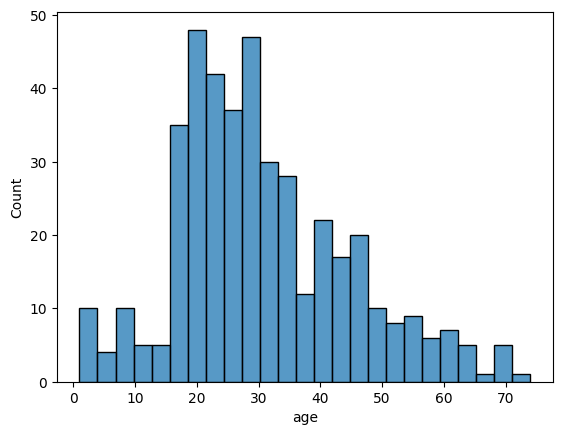

In [11]:
# 탑승객은 20~30가 가장 많았는데, 사망자는 어떨까
sns.histplot(data=df[df['survived'] == 0], x='age', bins=25)

<Axes: >

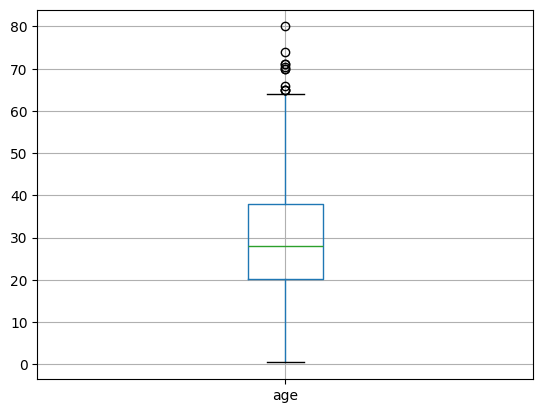

In [12]:
# 이상치(Outliar) 확인 및 처리

# 확인 - boxplot 사용
df.boxplot(column='age')

#### 이상치 처리
- 이상치로 구분하는 기준은 주관적이다. 
- IQR (Inter-Quantile Range) : 사분위수 범위
- 데이터를 중앙값을 기준으로 , Q1과 Q3 (25% ~ 75%)를 파악해 Min & Max를 구하는 방법
- IQR = Q3 - Q1
- Minimum = Q1 - (IQR*1.5)
- Maximum = Q3 + (IQR*1.5)

In [13]:
q3 = df['age'].quantile(q = 0.75)
q1 = df['age'].quantile(q = 0.25)
iqr = q3 - q1
min_range = q1 - iqr*1.5
max_range = q3 + iqr*1.5

In [14]:
min_range
# minus 이상치는 음수가 되므로, minimum은 계산 및 제거할 필요가 없다.

-6.6875

In [15]:
max_range

64.8125

In [16]:
df[df['age'] > max_range].count()
# 11명의 나이 이상치 데이터 발견

survived    11
pclass      11
sex         11
age         11
fare        11
who         11
alone       11
dtype: int64

In [17]:
# 이상치를 제거한 dataframe 생성
df1 = df[df['age']<max_range]

<Axes: >

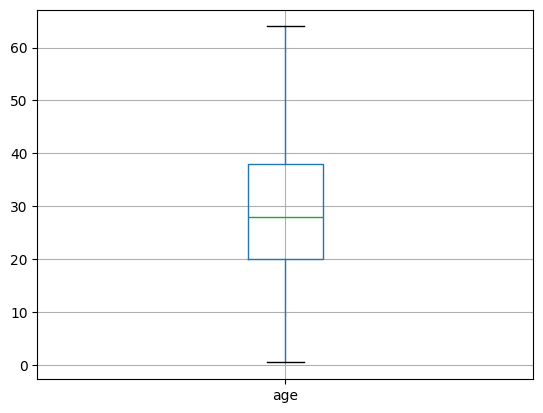

In [18]:
df1.boxplot('age')
# 연령 이상치가 제거됨

In [19]:
df1.describe()

,survived,pclass,age,fare
count,703.000000,703.000000,703.000000,703.000000
mean,0.411095,2.244666,29.072077,34.785093
std,0.492383,0.835397,13.728478,53.255433
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.000000,8.050000
50%,0.000000,3.000000,28.000000,15.741700
75%,1.000000,3.000000,38.000000,33.000000
max,1.000000,3.000000,64.000000,512.329200


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  703 non-null    int64  
 1   pclass    703 non-null    int64  
 2   sex       703 non-null    object 
 3   age       703 non-null    float64
 4   fare      703 non-null    float64
 5   who       703 non-null    object 
 6   alone     703 non-null    bool   
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 39.1+ KB


In [21]:
df1['survived'] = df1['survived'].astype('object')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 703 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  703 non-null    object 
 1   pclass    703 non-null    int64  
 2   sex       703 non-null    object 
 3   age       703 non-null    float64
 4   fare      703 non-null    float64
 5   who       703 non-null    object 
 6   alone     703 non-null    bool   
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 39.1+ KB


C:\Users\wooju\AppData\Local\Temp\ipykernel_10684\1015391521.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['survived'] = df1['survived'].astype('object')


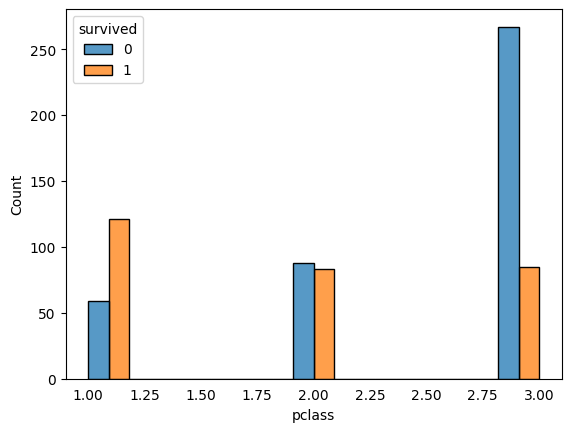

In [25]:
ax = sns.histplot(data = df1, 
                  x = 'pclass', 
                  hue='survived', 
                  multiple='dodge')
# hue : 범주
ax.tick_params(bottom=False)

In [26]:
df1.head(7)

,survived,pclass,sex,age,fare,who,alone
0,0,3,male,22.0,7.2500,man,False
1,1,1,female,38.0,71.2833,woman,False
2,1,3,female,26.0,7.9250,woman,True
3,1,1,female,35.0,53.1000,woman,False
4,0,3,male,35.0,8.0500,man,True
6,0,1,male,54.0,51.8625,man,True
7,0,3,male,2.0,21.0750,child,False


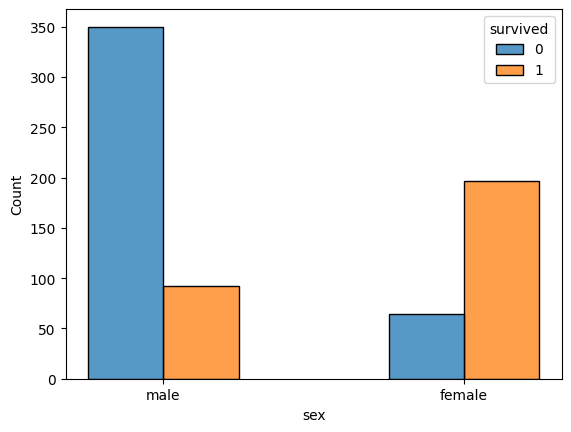

In [45]:
hist = sns.histplot(data=df1,x='sex',
             hue='survived',
             multiple='dodge',
             shrink=0.5,
             legend=True) # shrink : 막대 폭


In [47]:
df1['alone'].value_counts()

alone
True     395
False    308
Name: count, dtype: int64

In [50]:
# 혼자 탑승한 남성의 사망률
df1[(df1['sex']=='male')&(df1['alone']==True)]['survived'].value_counts()

survived
0    245
1     50
Name: count, dtype: int64

In [52]:
# 혼자 탑승한 여성의 사망률
df1[(df1['sex']=='female')&(df1['alone']==True)]['survived'].value_counts()

survived
1    79
0    21
Name: count, dtype: int64

In [59]:
df2 = df1[['survived','pclass','age','fare','alone']]

In [61]:
df_corr = df2.corr()

In [62]:
df_corr['survived']
# meaningful correlation
# negative correlation with pclass -> lower class, more dangerous
# positive correlation with fare -> more expansive, safer

survived    1.000000
pclass     -0.369544
age        -0.055246
fare        0.268995
alone      -0.194515
Name: survived, dtype: float64

<Axes: >

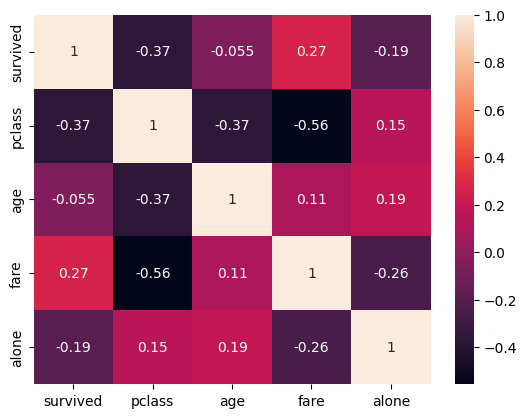

In [64]:
sns.heatmap(data = df_corr, annot=True)